# <center> SEMINARIO DE TESIS 1 </center>
<br>
<img src="img/LogoUlimaVector.png" align="center">
<br>
<br>

## <center> Comparativa de Técnicas ARIMA, Holt-Winters y Vectores de Soporte de Regresión </center>

### <center>Alumna: Cynthia Ospina</center>


## Parte 1: Carga de Datos

In [94]:
import pandas as pd
#Importar archivo cvs
ventas = pd.read_csv('Detalle_Venta_Producto.csv',encoding = "utf-8")

ventas.head()

,Id,NumPedido,FecEntrega,ImporteNeto,CodProducto,Detalle,Producto,ProdDesc,Fecha,ModalidadPago,ClientePreferente,TiempoAtencion
0,1,24699479,02/07/2013,43.46,6901104.0,Venta,6901104,NU.EXPERTA PRE MEZCLA BIZCOCHUELO 10KG,01/07/2013,2,0,2
1,2,24699479,02/07/2013,-0.43,NaN,Descuento,6901104,NaN,01/07/2013,2,0,3
2,3,24699479,02/07/2013,58.47,6901105.0,Venta,6901105,NU.EXPERTA PRE MEZCLA TORTA CHOC.10KG.,01/07/2013,2,1,6
3,4,24699479,02/07/2013,-0.58,NaN,Descuento,6901105,NaN,01/07/2013,2,1,3
4,5,24699479,02/07/2013,89.49,17413.0,Venta,17413,HARINA BLANCA NIEVE EXT. PP. 50K,01/07/2013,1,1,4


In [95]:
#Identificando tipo de datos (en este caso tipo fecha y número)
ventas['ImporteNeto'] = pd.to_numeric(ventas['ImporteNeto'])
ventas['FecEntrega'] = pd.to_datetime(ventas['FecEntrega'])
ventas['Fecha'] = pd.to_datetime(ventas['Fecha'])

ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Id                 14579 non-null  int64         
 1   NumPedido          14579 non-null  int64         
 2   FecEntrega         14579 non-null  datetime64[ns]
 3   ImporteNeto        14579 non-null  float64       
 4   CodProducto        9277 non-null   float64       
 5   Detalle            14579 non-null  object        
 6   Producto           14579 non-null  int64         
 7   ProdDesc           9275 non-null   object        
 8   Fecha              14579 non-null  datetime64[ns]
 9   ModalidadPago      14579 non-null  int64         
 10  ClientePreferente  14579 non-null  int64         
 11  TiempoAtencion     14579 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(6), object(2)
memory usage: 1.3+ MB


## Parte 2: Filtros y Limpieza de la información


In [96]:
#Aplicando filtros de fecha a la información
ventas = ventas[ventas['Detalle'] == 'Venta']
ventas['Año'] = pd.DatetimeIndex(ventas['Fecha']).year
ventas['Mes'] = pd.DatetimeIndex(ventas['Fecha']).month
ventas.reset_index()

ventas = ventas[ventas['Fecha'] >= '2016-01-01']
ventas = ventas[ventas['Fecha'] <= '2018-12-31']

ventas.head(8)

,Id,NumPedido,FecEntrega,ImporteNeto,CodProducto,Detalle,Producto,ProdDesc,Fecha,ModalidadPago,ClientePreferente,TiempoAtencion,Año,Mes
4301,4302,42931792,2016-05-01,158.00,3300056.0,Venta,3300056,N.MAYONESA ALACENA 1000CC 6BOL,2016-01-01,2,0,8,2016,1
4302,4303,42931792,2016-05-01,81.40,3300055.0,Venta,3300055,N.MAYONESA ALACENA 500CC 12BOL,2016-01-01,1,1,9,2016,1
4303,4304,42931792,2016-05-01,43.80,3300054.0,Venta,3300054,N.MAYONESA ALACENA 200CC 12BOL,2016-01-01,1,0,2,2016,1
4304,4305,42931792,2016-05-01,43.70,3300015.0,Venta,3300015,CREMA DE AJI TARI 85GR. 24UND,2016-01-01,2,1,5,2016,1
4305,4306,42931792,2016-05-01,0.00,3300015.0,Venta,3300015,CREMA DE AJI TARI 85GR. 24UND,2016-01-01,1,1,7,2016,1
4306,4307,42931792,2016-05-01,79.50,3300016.0,Venta,3300016,CREMA DE AJI TARI 400GR. 12UND,2016-01-01,1,1,4,2016,1
4307,4308,42931792,2016-05-01,43.83,3407.0,Venta,3407,SALSA ROCOTO ALACENA 8CC 240UND,2016-01-01,1,1,8,2016,1
4308,4309,42931792,2016-05-01,19.53,3300107.0,Venta,3300107,UCHUCUTA ALACENA 400GR X 12UND,2016-01-01,1,1,4,2016,1


#### Tabla dinámica para visualizar productos con más venta

In [101]:
#Tabla dinámica para ver productos con mayor venta en los 3 años de análisis
venta_pt = ventas.pivot_table(index='ProdDesc',
                              columns={'Año'},
                              values='ImporteNeto',
                              aggfunc='sum',
                              fill_value = '0', 
                              margins = True, 
                              margins_name='Total').sort_values('Total', ascending=False).head(10)

venta_pt

Año,2016,2017,2018,Total
ProdDesc,,,,
Total,74875,69871.2,98427.1,243173
MARGA.ESPARC.SELLO DE ORO 2KG 5PQT,6748.17,8378.87,15398.1,30525.2
MAYONESA BASE MACBEL 2X2LT 1CJA,1224.74,6807.68,9789.07,17821.5
NUEVA MANTECA FAMOSA COSTA 10KG 1CJA,3905.3,4980.88,6006.69,14892.9
N.MAYONESA ALACENA 100CC 24BOL,5375.12,4860.45,4132.6,14368.2
HARINA NICOLINI PREMIUM PP.50K,4618.17,3123.63,4895.4,12637.2
HARINA BLANCA FLOR PREP.1K 12BOL,4407.65,3257.44,4567.66,12232.8
MAYONESA ALACENA 10CC 240UND,3657.02,4049.2,3852.4,11558.6
N.MAYONESA ALACENA 500CC 12BOL,3721.67,2802.07,2746.51,9270.25


In [108]:
#Obtener la descripción de los productos de la tabla dinámica
prodSeleccionados = venta_pt.reset_index()
prodSeleccionados = prodSeleccionados['ProdDesc']

prodSeleccionados = prodSeleccionados[4:6]
prodSeleccionados

4    N.MAYONESA ALACENA 100CC 24BOL
5    HARINA NICOLINI PREMIUM PP.50K
Name: ProdDesc, dtype: object

### Estamos seleccionando y filtrando los 2 productos a los que les vamos a aplicar el análisis

In [109]:
#Aplicar filtros para obtener la data que necesitan los algoritmos
pd_prod = ventas['ProdDesc'].unique()
print('Cantidad de productos: ',len(pd_prod))
print('Cantidad de productos a analizar (más relevantes por ventas): ', len(prodSeleccionados))
print('% de productos a realiza análisis:', round((len(prodSeleccionados)/len(pd_prod)) * 100,2))
print('')
pd_venta = ventas[['ProdDesc','Fecha','Año','Mes','ImporteNeto','ModalidadPago','ClientePreferente','TiempoAtencion']] 
pd_venta = pd_venta[pd_venta['Fecha'] >= '2016-01-01']
pd_venta = pd_venta[pd_venta['Fecha'] <= '2018-12-31']
pd_venta = pd_venta[['ProdDesc','Fecha','ImporteNeto','ModalidadPago','ClientePreferente','TiempoAtencion']] 
pd_venta = pd_venta.reset_index()
pd_venta.groupby(['ProdDesc','Fecha','ImporteNeto']).sum().sort_values(['ProdDesc','Fecha'])
pd_venta = pd_venta[['ProdDesc','Fecha','ImporteNeto','ModalidadPago','ClientePreferente','TiempoAtencion']] 

prodSeleccionados = prodSeleccionados.tolist() 

pd_venta = pd_venta.reset_index()
pd_venta = pd_venta.values.tolist()
   


Cantidad de productos:  194
Cantidad de productos a analizar (más relevantes por ventas):  2
% de productos a realiza análisis: 1.03



## Ejecución del Modelo ARIMA

Test MSE: 470794.055
Test MAE: 652.973
Test MAPE: 1.682
Test Exactitud: -0.682
Test MSE: 96715.985
Test MAE: 294.291
Test MAPE: 0.369
Test Exactitud: 0.631


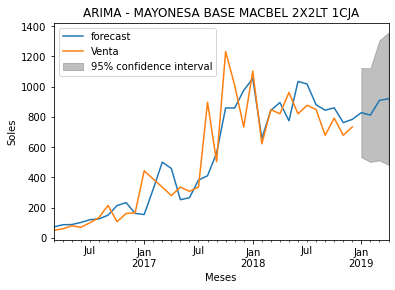

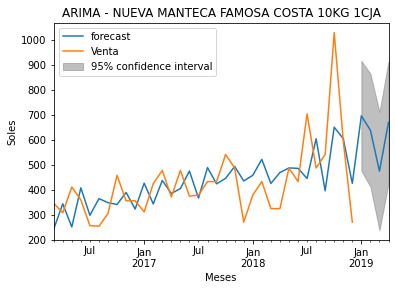

In [37]:
import warnings
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import date2num
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error,accuracy_score

warnings.filterwarnings('ignore')


for i in prodSeleccionados:
    l_final = []
    for j in pd_venta:
        if j[1] == i:
            l_final.append(j[2:])
            
    #Generando DataFrames
    df = pd.DataFrame(l_final, columns =['Fec','Venta','ModalidadPago','ClientePreferente','TiempoAtencion'])
    df['Año'] = pd.DatetimeIndex(df['Fec']).year
    df['Mes'] = pd.DatetimeIndex(df['Fec']).day
    df['Fecha'] = df['Año'].astype(str) + "-" + df['Mes'].astype(str) + "-1"
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    df['Venta'] = pd.to_numeric(df['Venta'])
    df = df[['Fecha','Venta']]
    df = df.groupby(['Fecha']).sum()
    #Información de ventas del producto que se esta evaluando
    df = df['Venta']
    
    
    
    #Aquí comienza el ARIMA
    model = ARIMA(df, order=(5,1,1))
    model_fit = model.fit(disp=0)
    model_fit.plot_predict(start=2, end = 39)
    
    pred = model_fit.forecast(steps=39)[0]
    forecast = model_fit.predict(start=2, end=39)
    #Añadir etiquetas
    plt.ylabel('Soles')
    plt.xlabel('Meses')
    plt.title('ARIMA - ' + str(i))
    
    
    
    
    #print(len(df[3:]),'-',len(pred[:33]))
    #print(pred)
    error = mean_squared_error(df[3:], pred[:33])
    error2 = mean_absolute_error(df[3:], pred[:33])
    error3 = mean_squared_log_error(df[3:], pred[:33])
    print('Test MSE: %.3f' % error)
    print('Test MAE: %.3f' % error2)
    print('Test MAPE: %.3f' % error3)
    print('Test Exactitud: %.3f' % (1- error3))
    
    del df
    
    
    

## Ejecución del Método Holt-Winters

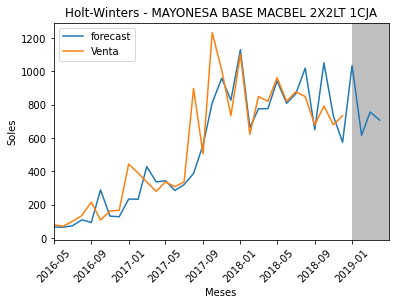

Test MSE: 21823.354
Test MAE: 92.286
Test MAPE: 0.118
Test Exactitud: 0.882


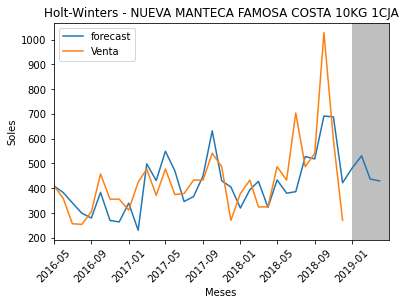

Test MSE: 11904.234
Test MAE: 78.298
Test MAPE: 0.058
Test Exactitud: 0.942


In [38]:
import warnings
from datetime import datetime
from matplotlib.dates import date2num
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error,accuracy_score

warnings.filterwarnings('ignore')

for i in prodSeleccionados:
    l_final = []
    for j in pd_venta:
        if j[1] == i:
            l_final.append(j[2:])
            
    #Generando DataFrames
    df = pd.DataFrame(l_final, columns =['Fec','Venta','ModalidadPago','ClientePreferente','TiempoAtencion'])
    df['Año'] = pd.DatetimeIndex(df['Fec']).year
    df['Mes'] = pd.DatetimeIndex(df['Fec']).day
    df['Fecha'] = df['Año'].astype(str) + "-" + df['Mes'].astype(str) + "-1"
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    df['Venta'] = pd.to_numeric(df['Venta'])
    df = df[['Fecha','Venta']]
    df = df.groupby(['Fecha']).sum()
    df = df['Venta']
    
    #Aquí comienza el Holt Winters
    model = ExponentialSmoothing(df,seasonal='mul', seasonal_periods=12).fit()
    pred = model.predict(start=3, end=39)
    
    plt.plot(pred, label='forecast')
    plt.plot(df[3:], label='Venta')
    plt.legend(loc="upper left")
    
    axes = plt.gca()
    #axes.set_ylim([0,18500])
    #axes.set_xlim([0,39])
    axes.set_xlim([date2num(datetime(2016,5,1)), date2num(datetime(2019,4,30))])
    
    plt.ylabel('Soles')
    plt.xlabel('Meses')
    plt.title('Holt-Winters - ' + str(i))
    plt.xticks(rotation=45)
    plt.axvspan(date2num(datetime(2019,1,1)), date2num(datetime(2019,4,30)), facecolor='grey', alpha=0.5)
    plt.show()
    
    error = mean_squared_error(df[3:], pred[:33])
    error2 = mean_absolute_error(df[3:], pred[:33])
    error3 = mean_squared_log_error(df[3:], pred[:33])
    print('Test MSE: %.3f' % error)
    print('Test MAE: %.3f' % error2)
    print('Test MAPE: %.3f' % error3)
    print('Test Exactitud: %.3f' % (1- error3))
    

    
    del df
    
    

    

## Ejecución de Modelo Máquina de Soporte de Regresión

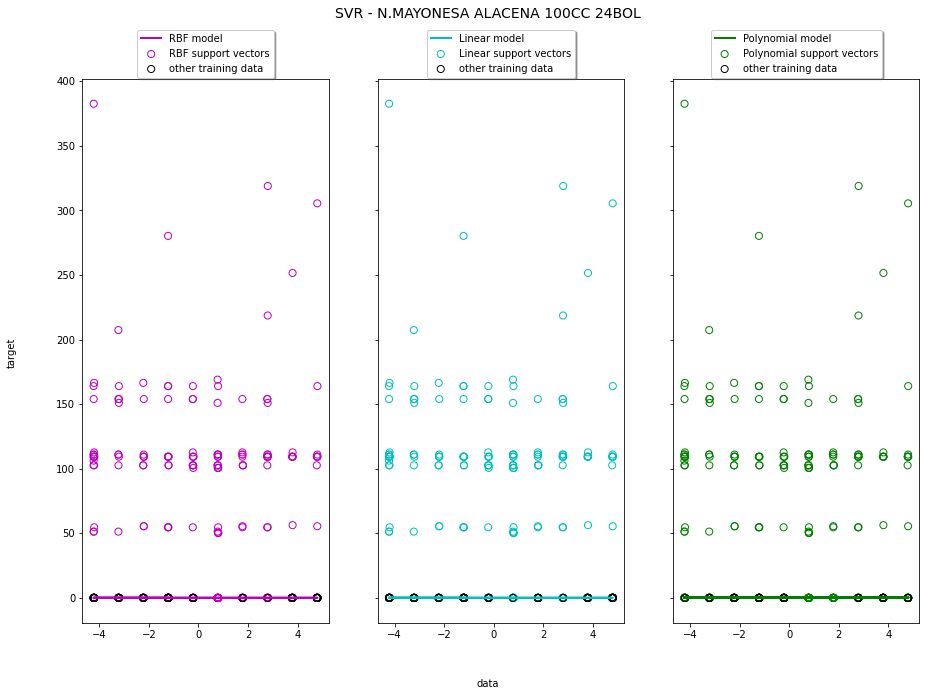

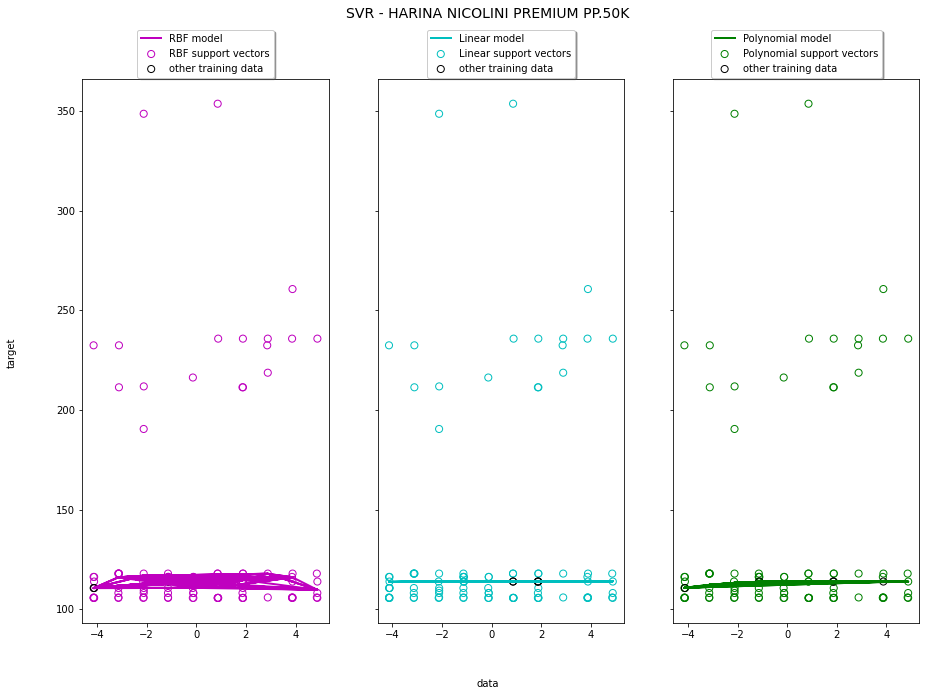

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error,accuracy_score

for i in prodSeleccionados:
    l_final = []
    for j in pd_venta:
        if j[1] == i:
            l_final.append(j[2:])
            
    #Generando DataFrames
    df = pd.DataFrame(l_final, columns =['Fec','Venta','ModalidadPago','ClientePreferente','TiempoAtencion'])
    df['Año'] = pd.DatetimeIndex(df['Fec']).year
    df['Mes'] = pd.DatetimeIndex(df['Fec']).day
    df['Fecha'] = df['Año'].astype(str) + "-" + df['Mes'].astype(str) + "-1"
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    df['Venta'] = pd.to_numeric(df['Venta'])
    df = df[['Fecha','Venta','ModalidadPago','ClientePreferente','TiempoAtencion']]
    
    #Reduciendo variables a un componente (dado que Y es venta)
    pca = PCA(n_components=1)
    X = pca.fit_transform(df[['ModalidadPago','ClientePreferente','TiempoAtencion']])
    y = (df[['Venta']]).values.ravel()
    
    #Aquí comienza los vectores de soporte de regresión
    
    svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
    svr_lin = SVR(kernel='linear', C=100, gamma='auto')
    svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
                   coef0=1)

    lw = 2

    svrs = [svr_rbf, svr_lin, svr_poly]
    kernel_label = ['RBF', 'Linear', 'Polynomial']
    model_color = ['m', 'c', 'g']
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)

    for ix, svr in enumerate(svrs):
        axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                      label='{} model'.format(kernel_label[ix]))
        axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                         edgecolor=model_color[ix], s=50,
                         label='{} support vectors'.format(kernel_label[ix]))
        axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                         y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                         facecolor="none", edgecolor="k", s=50,
                         label='other training data')
        axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                        ncol=1, fancybox=True, shadow=True)

    fig.text(0.5, 0.04, 'data', ha='center', va='center')
    fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
    fig.suptitle("SVR - " + str(i), fontsize=14)
    plt.show()
    
    
    del df

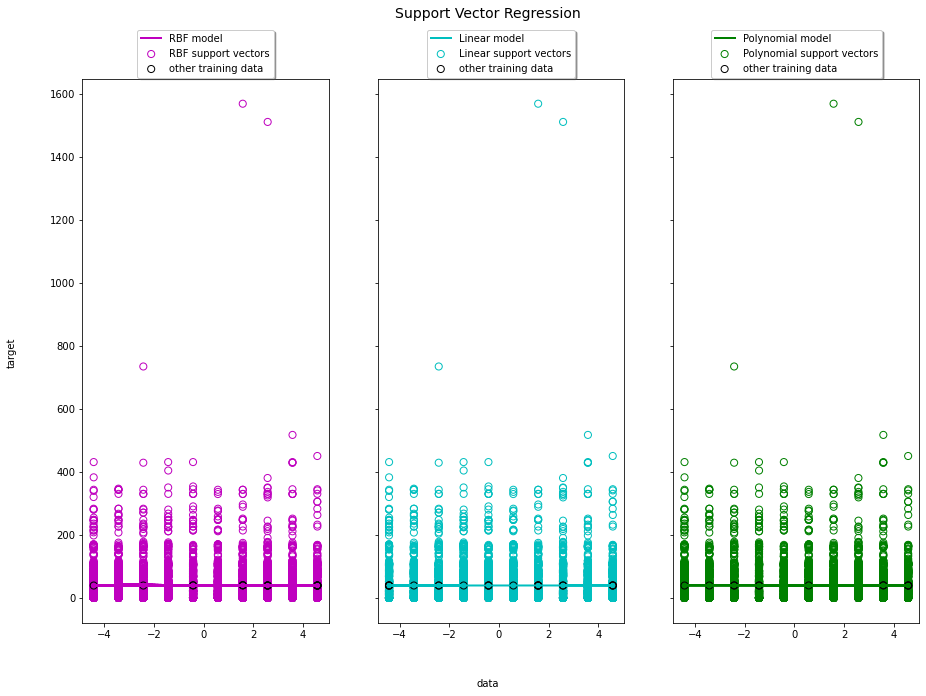

In [79]:
df_SVR = pd.DataFrame(pd_venta, columns =['Ind','Producto','Fec','Venta','ModalidadPago','ClientePreferente','TiempoAtencion'])

from sklearn.decomposition import PCA
import numpy as np

df_Datos = df_SVR[['ModalidadPago','ClientePreferente','TiempoAtencion']]
df_Y = df_SVR[['Venta']]

pca = PCA(n_components=1)
X = pca.fit_transform(df_Datos)

y = df_Y.values.ravel()

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)

for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()



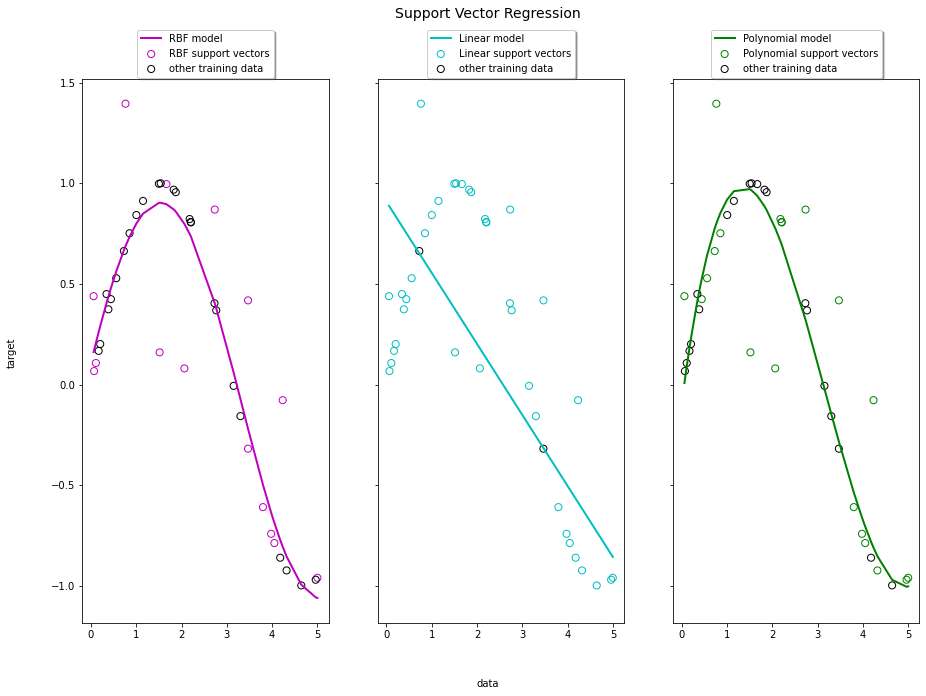

In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd

#Importar archivo cvs
ventas = pd.read_csv('Detalle_Venta_Producto.csv',encoding = "utf-8")
ventas['ImporteNeto'] = pd.to_numeric(ventas['ImporteNeto'])
ventas['FecEntrega'] = pd.to_datetime(ventas['FecEntrega'])
ventas['Fecha'] = pd.to_datetime(ventas['Fecha'])
ventas = ventas[ventas['Detalle'] == 'Venta']
ventas['Año'] = pd.DatetimeIndex(ventas['Fecha']).year
ventas['Mes'] = pd.DatetimeIndex(ventas['Fecha']).month
ventas.reset_index()
ventas = ventas[ventas['Fecha'] >= '2016-01-01']
ventas = ventas[ventas['Fecha'] <= '2018-12-31']


# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)

for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()



In [61]:
type(y)

numpy.ndarray